In [2]:
import matplotlib.pyplot as plt
import glob
# import matplotlib
import numpy as np
# import tkinter
# matplotlib.use('TkAgg')
%matplotlib inline

#plumed sum_hills --hills HILLS

In [3]:
def openHills(fileName):
    with open(fileName) as file:
        [file.readline() for x in range(5)]
        data = np.fromfile(file, sep= " ", dtype=float)
    phi, energy, error = data.reshape(-1,3).T
    phi = (phi/np.pi)*180
    energy = energy - energy.min()
    return phi, energy, error


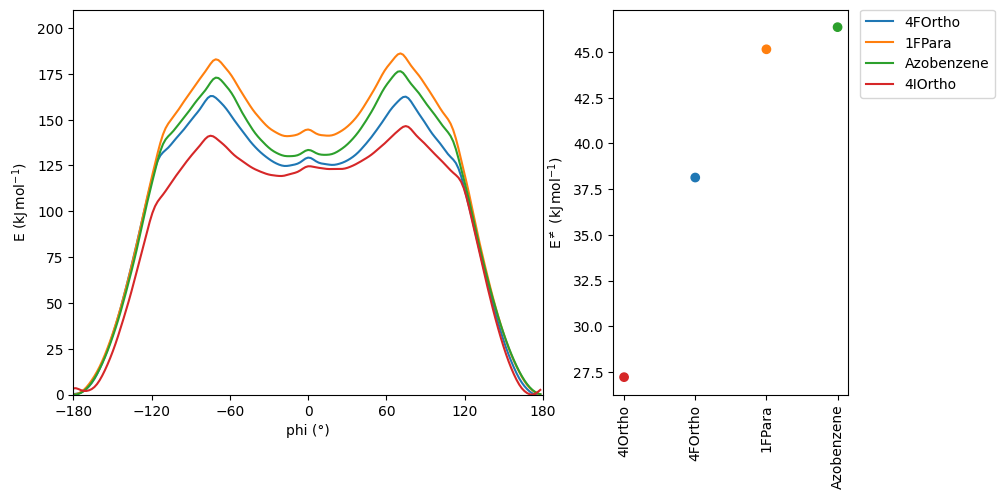

In [3]:
filePaths = glob.glob("Plumed/HillsFiles/*")

fig, ax= plt.subplots(1,2, width_ratios=[2, 1])
fig.set_size_inches(10, 5)
ax1, ax2 = ax
ax1.set_xlim(-180, 180)
ax1.set_ylim(0, 210)
ax1.set_xticks([x for x in range(-180, 181, 60)])
tsEnergys = [] 
artists = []
for filePath in filePaths:
    phi, energy, error = openHills(filePath)
    art, = ax1.plot(phi, energy, label = filePath.split("/")[-1].removesuffix(".dat"))
    tsEnergys.append([filePath.split("/")[-1].removesuffix(".dat"), energy.max()-energy[50:120].min(), art.get_color()])
    artists.append(art)
ax1.set_xlabel(r"phi (°)")
ax1.set_ylabel(r"E ($\text{kJ}\,\text{mol}^{-1}$)");


tsEnergys.sort(key=lambda x: x[1])
labels, energys, color = np.array(tsEnergys).T
energys = np.array(energys, dtype=float)
ax2.scatter(labels, energys, c = color)
ax2.set_ylabel(r"E$^{\neq}$ ($\text{kJ}\,\text{mol}^{-1}$)")
plt.legend(artists, [x.get_label() for x in artists], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90);
fig.savefig("Halogens.png", bbox_inches="tight")

ValueError: not enough values to unpack (expected 3, got 0)

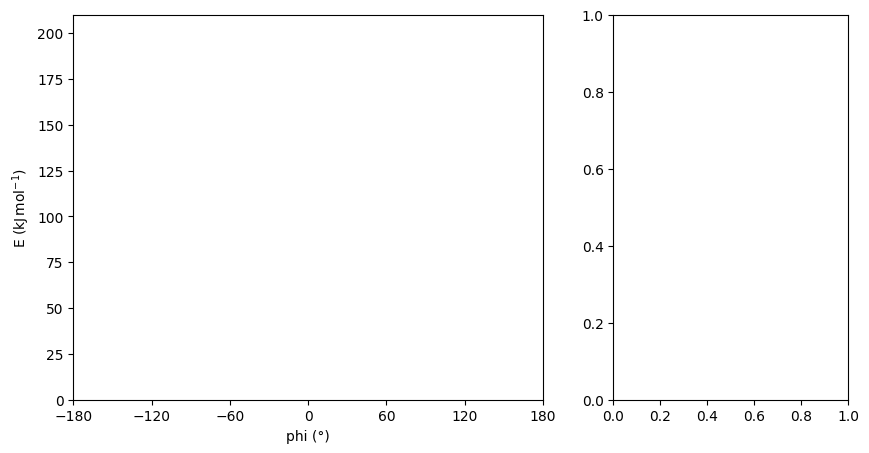

In [9]:
filePaths = glob.glob("Plumed/Other/*")

fig, ax= plt.subplots(1,2, width_ratios=[2, 1])
fig.set_size_inches(10, 5)
ax1, ax2 = ax
ax1.set_xlim(-180, 180)
ax1.set_ylim(0, 210)
ax1.set_xticks([x for x in range(-180, 181, 60)])
tsEnergys = [] 
artists = []
for filePath in filePaths:
    phi, energy, error = openHills(filePath)
    art, = ax1.plot(phi, energy, label = filePath.split("/")[-1].removesuffix(".dat"))
    tsEnergys.append([filePath.split("/")[-1].removesuffix(".dat"), energy.max()-energy[50:130].min(), art.get_color()])
    artists.append(art)
ax1.set_xlabel(r"phi (°)")
ax1.set_ylabel(r"E ($\text{kJ}\,\text{mol}^{-1}$)");


tsEnergys.sort(key=lambda x: x[1])
labels, energys, color = np.array(tsEnergys).T
energys = np.array(energys, dtype=float)
ax2.scatter(labels, energys, c = color)
ax2.set_ylabel(r"E$^{\neq}$ ($\text{kJ}\,\text{mol}^{-1}$)")
plt.legend(artists, [x.get_label() for x in artists], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90);
fig.savefig("OtherCompunds.png", bbox_inches="tight")

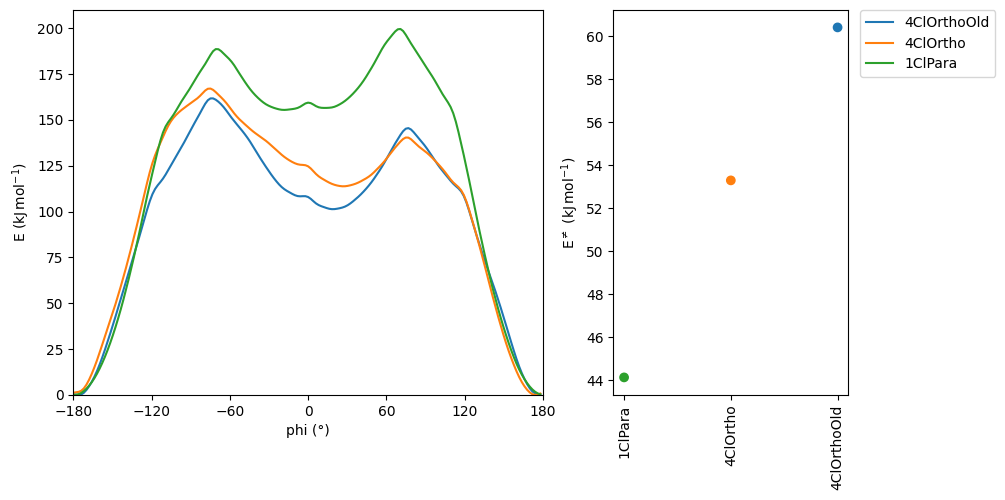

In [5]:
filePaths = glob.glob("Plumed/Bad/*")

fig, ax= plt.subplots(1,2, width_ratios=[2, 1])
fig.set_size_inches(10, 5)
ax1, ax2 = ax
ax1.set_xlim(-180, 180)
ax1.set_ylim(0, 210)
ax1.set_xticks([x for x in range(-180, 181, 60)])
tsEnergys = [] 
artists = []
for filePath in filePaths:
    phi, energy, error = openHills(filePath)
    art, = ax1.plot(phi, energy, label = filePath.split("/")[-1].removesuffix(".dat"))
    tsEnergys.append([filePath.split("/")[-1].removesuffix(".dat"), energy.max()-energy[50:130].min(), art.get_color()])
    artists.append(art)
ax1.set_xlabel(r"phi (°)")
ax1.set_ylabel(r"E ($\text{kJ}\,\text{mol}^{-1}$)");


tsEnergys.sort(key=lambda x: x[1])
labels, energys, color = np.array(tsEnergys).T
energys = np.array(energys, dtype=float)
ax2.scatter(labels, energys, c = color)
ax2.set_ylabel(r"E$^{\neq}$ ($\text{kJ}\,\text{mol}^{-1}$)")
plt.legend(artists, [x.get_label() for x in artists], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90);
fig.savefig("OtherCompunds.png", bbox_inches="tight")

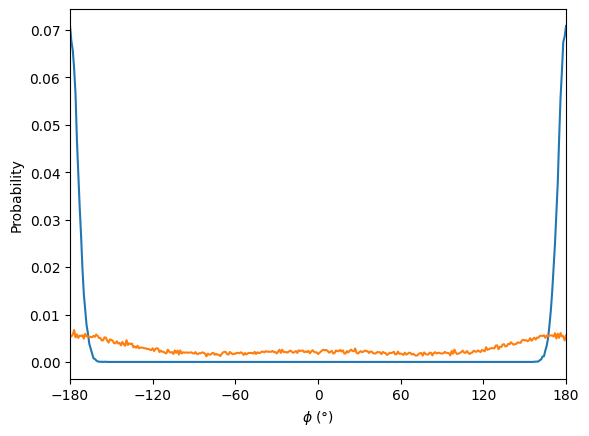

In [6]:
arr = np.genfromtxt("AngleDistributions/F1paraNoPotential.xvg", dtype=float).T
arr2 = np.genfromtxt("AngleDistributions/F1paraWithPotential.xvg", dtype=float).T
fig, ax = plt.subplots()
ax.set_xticks([x for x in range(-180, 181, 60)])
ax.set_xlim(-180, 180)
ax.plot(arr[0], arr[1])
ax.plot(arr2[0], arr2[1])
ax.set_xlabel(r"$\phi$ (°)");
ax.set_ylabel(r"Probability");
fig.savefig("AngleDistributions.png", bbox_inches="tight")

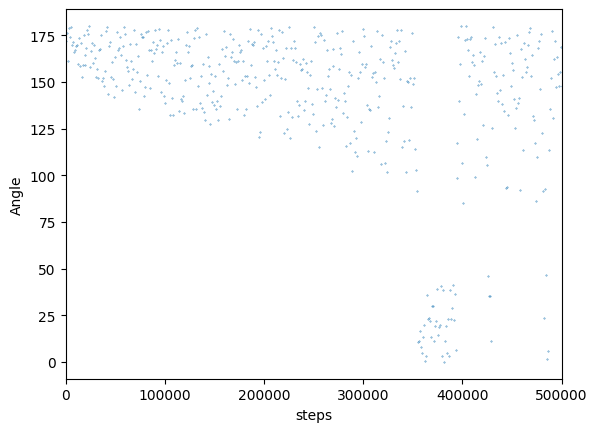

In [18]:
arr = np.genfromtxt("AngleOverTime/F1ParaOvertimePlumed.xvg", dtype=float).T
fig, ax = plt.subplots()
# ax.set_xticks([x for x in range(-180, 181, 60)])
ax.set_xlim(0, 500000)
ax.scatter(arr[0]*500, np.abs(arr[1]), s = 0.1)
ax.set_xlabel(r"steps");
ax.set_ylabel(r"Angle");
fig.savefig("AngleOverTime.png", bbox_inches="tight")